### Q&A Activity Question Week-10

Do the following on the dataset 'employee.csv'  
1. Load the data into the pandas environment and identify some basic details of the dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10. Do the standard scaling on the feature performance score.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

### 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
data=pd.read_csv('employee.csv')

In [3]:
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [4]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


### 2. Reset the index as "name" as the index.

In [6]:
data.set_index('name', inplace=True)

In [7]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3. Select rows for specific names Jack Morgan and Josh wills.

In [8]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [9]:
grouped = data.groupby('department')

In [10]:
finance = grouped.get_group('Finance')

In [11]:
finance

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


In [12]:
sales = grouped.get_group('Sales')

In [13]:
sales

,age,income,gender,department,grade,performance_score
name,,,,,,
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [14]:
datframes = [finance, sales]
groupeddata = pd.concat(datframes)
groupeddata

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score.

In [15]:
data2 = data[data['performance_score']>700].index
for i in data2:
    print(i)

Allen Smith
Dheeraj Patel
Josh Wills
Leo Duck


### 6. Display employee who has more than 500 and less than 700 performance score

In [16]:
data3 = data[(data['performance_score']>500) & (data['performance_score']<700)].index
for i in data3:
    print(i)

S Kumar
Jack Morgan
Ying Chin
Satyam Sharma


### 7. Check and handle missing values in the dataset.

In [17]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [18]:
data['gender'].value_counts()

F    5
M    2
Name: gender, dtype: int64

In [19]:
# filling null values in 'gender' with the mode value
data['gender'].fillna(data['gender'].mode()[0],inplace=True)

In [20]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,F,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,F,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [21]:
data['age'].mean()

40.42857142857143

In [22]:
data['age'].median()

45.0

In [23]:
# filling null values in 'age' with the median value
data["age"].fillna(data['age'].median(),inplace = True) 

In [24]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [25]:
data.groupby('grade')['income'].mean()

grade
G0    16000.000000
G2    38500.000000
G3    59666.666667
G4    98000.000000
Name: income, dtype: float64

In [26]:
data.groupby('grade')['income'].median()

grade
G0    16000.0
G2    38500.0
G3    62000.0
G4    98000.0
Name: income, dtype: float64

In [27]:
# filling null values in 'income' with the mean value
for i in ['income']:
    data[i]=data[i].fillna(data[data['grade']=='G3']['income'].mean())

In [28]:
data.groupby('grade')['income'].mean()

grade
G0    16000.000000
G2    38500.000000
G3    59666.666667
G4    98000.000000
Name: income, dtype: float64

In [29]:
data.groupby('grade')['income'].median()

grade
G0    16000.000000
G2    38500.000000
G3    59666.666667
G4    98000.000000
Name: income, dtype: float64

In [30]:
data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

**All the null values have been filled**

### 8. Check the outliers and handle outliers in performance score using Percentiles.

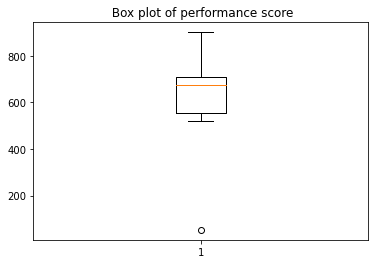

In [31]:
#plotting boxplot to check for outliers
plt.boxplot(data['performance_score'])
plt.title(' Box plot of performance score');

In [32]:
Q1 = np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2 = np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3 = np.percentile(data['performance_score'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

556.0
674.0
711.0


In [33]:
#median = Q2
data['performance_score'].median()

674.0

In [34]:
IQR = Q3-Q1
low_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('IQR is : ', IQR)
print('Lower limit is : ', low_limit)
print('Upper limit is : ', upper_limit)

IQR is :  155.0
Lower limit is :  323.5
Upper limit is :  943.5


In [35]:
outlier=[]
for x in data['performance_score']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)

In [36]:
outlier

[53]

In [37]:
# To find the index of the outliers upper limit
ind1 = data['performance_score'] > upper_limit
data.loc[ind1].index

Index([], dtype='object', name='name')

In [38]:
# To find the index of the outliers lower limit
ind2 = data['performance_score'] < low_limit
data.loc[ind2].index

Index(['James Authur'], dtype='object', name='name')

In [39]:
# Dropping the outliers from the dataset
data.drop(['James Authur'],inplace=True)

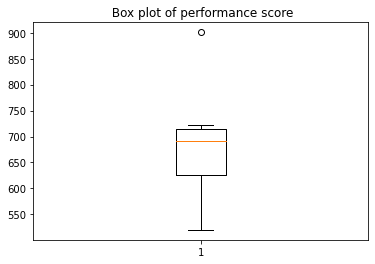

In [40]:
plt.boxplot(data['performance_score'])
plt.title(' Box plot of performance score');

**Removed Outliers from dataset**

### 9. Check the gender column and do Dummy encoding.

In [41]:
#generate binary values using get_dummies
data_dummies = pd.get_dummies(data['gender'])
data_dummies

,F,M
name,,
Allen Smith,1,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,1,0
Josh Wills,1,0
Leo Duck,0,1


In [42]:
#concatenating the actual dataset with dummy variables
data=pd.concat([data, data_dummies], axis=1)
data

,age,income,gender,department,grade,performance_score,F,M
name,,,,,,,,
Allen Smith,45.0,59666.666667,F,Operations,G3,723,1,0
S Kumar,45.0,16000.000000,F,Finance,G0,520,1,0
Jack Morgan,32.0,35000.000000,M,Finance,G2,674,0,1
Ying Chin,45.0,65000.000000,F,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649,1,0
Josh Wills,54.0,52000.000000,F,Finance,G3,901,1,0
Leo Duck,23.0,98000.000000,M,Sales,G4,709,0,1


In [43]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
F                      uint8
M                      uint8
dtype: object

**Encoded the column 'gender' and converted categorical variable to numerical variable**

### 10. Do the standard scaling on the feature performance score.

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
StandardScaler().fit_transform(data[['performance_score']])

array([[ 0.39226224],
       [-1.47587231],
       [-0.05866679],
       [-1.14457751],
       [ 0.28183064],
       [-0.28873262],
       [ 2.03033096],
       [ 0.26342538]])

In [46]:
x = StandardScaler().fit_transform(data[['performance_score']])

In [47]:
perfscore = pd.DataFrame(x)

In [48]:
perfscore.describe().applymap(lambda x: f"{x:0.2f}")

,0
count,8.00
mean,0.00
std,1.07
min,-1.48
25%,-0.50
50%,0.10
75%,0.31
max,2.03


**Standardization transformed the data such that:  
Standard deviation is 1  
Range is between -1.5 and 2.0  
Data is distributed around mean=0**